Dataset: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
import os
import pandas as pd

# Extracción de datos
data_path = '/content/drive/MyDrive/Modulo2/Datos/diabetes_health_indicators.csv'
df= pd.read_csv(data_path, low_memory=False, delimiter=',')

data = df.drop(columns=['Diabetes_012'])
train_labels = df['Diabetes_012'].iloc[:int(len(data) * .8)]
test_labels = df['Diabetes_012'].iloc[int(len(data) * .8):]


train_set = data.iloc[:int(len(data) * .8)]
test_set = data.iloc[int(len(data) * .8):]

Set de entrenamiento no normalizado


<Axes: >

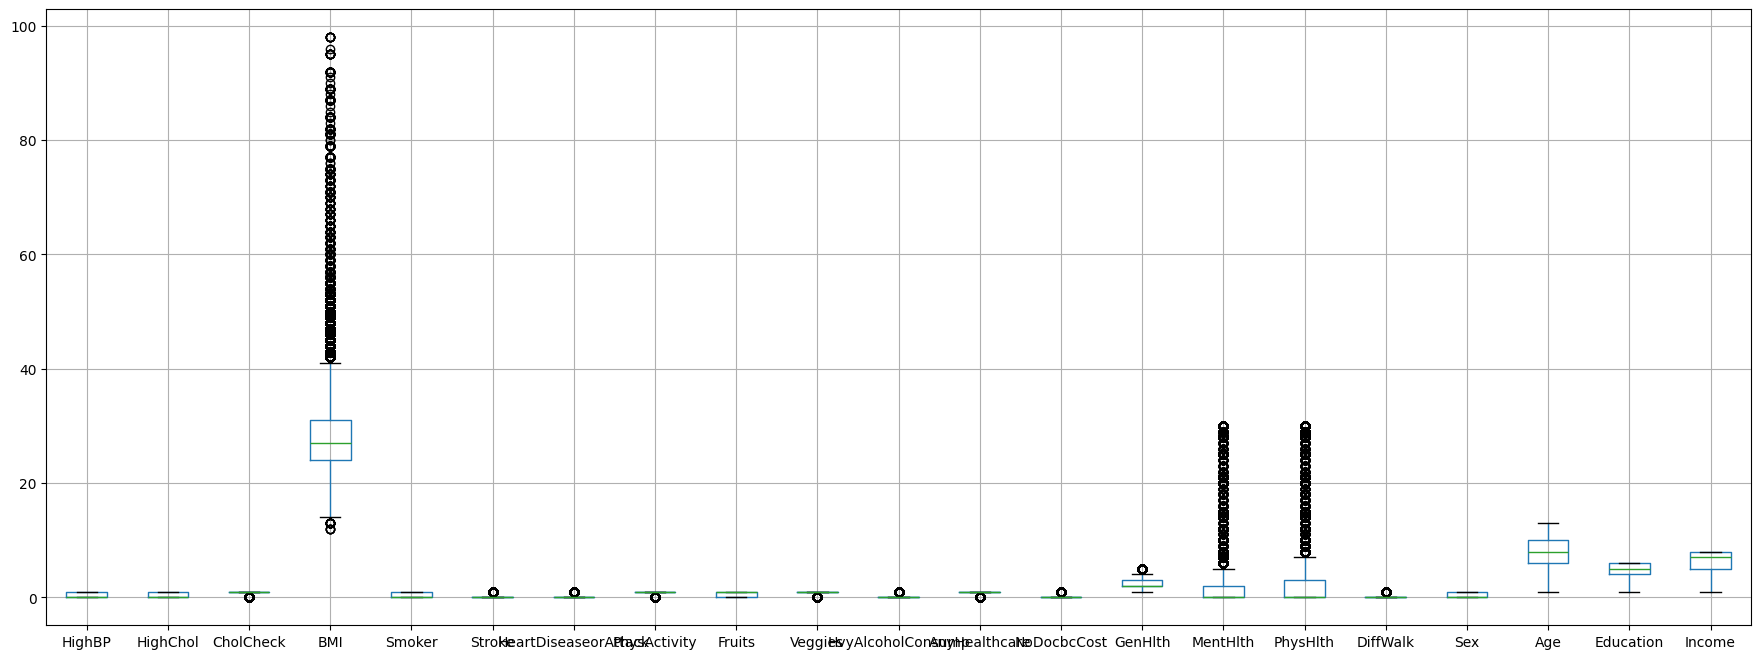

In [138]:
import matplotlib as plt

# Visualización gráfica de los datos no normalizados
print('Set de entrenamiento no normalizado')
train_set.boxplot(figsize=(22, 8))

Set de pruebas no normalizado


<Axes: >

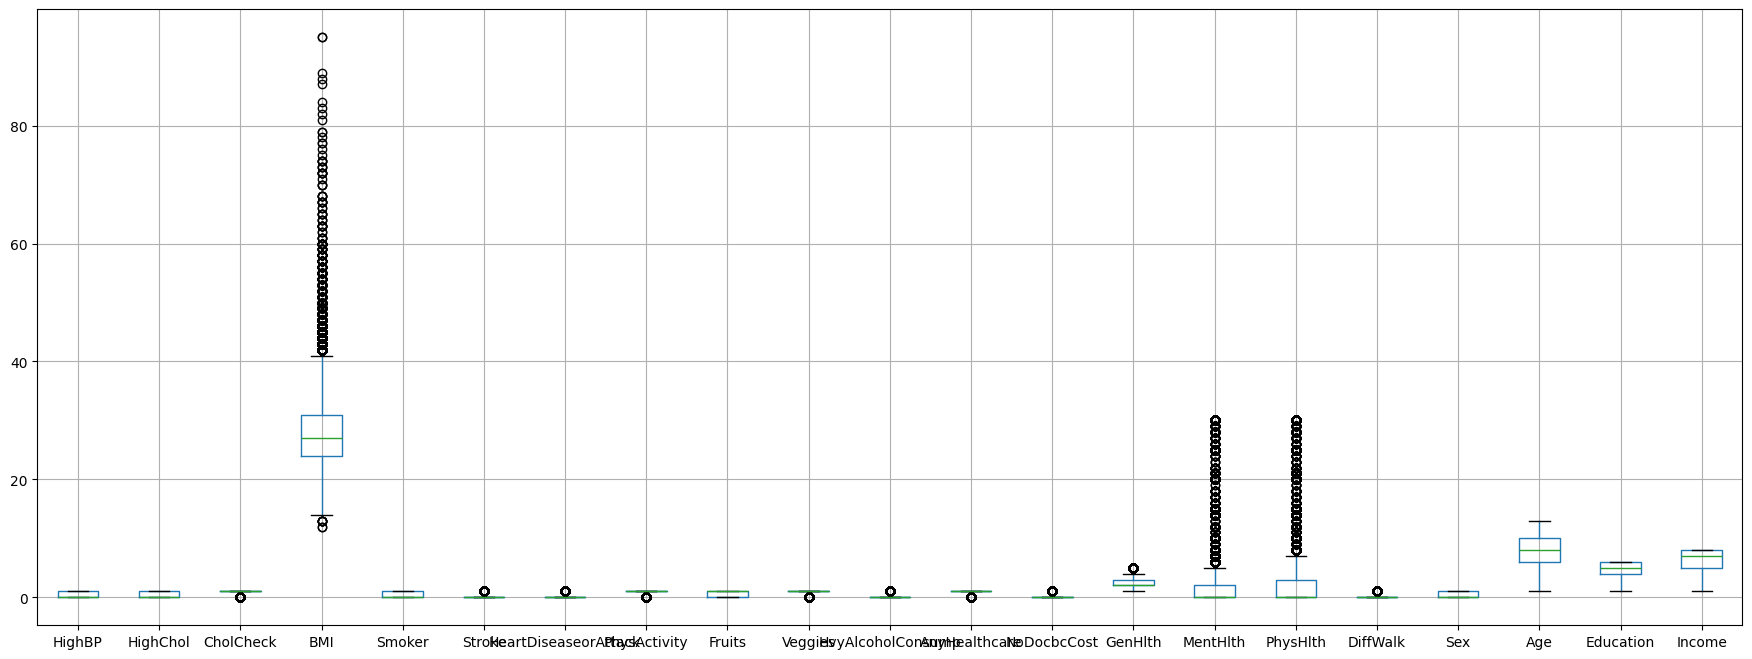

In [139]:
# Visualización gráfica de los datos de pruebas no normalizados
print('Set de pruebas no normalizado')
test_set.boxplot(figsize=(22, 8))

In [140]:
from sklearn.preprocessing import StandardScaler

# Normalización de datos
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_set), columns=data.columns)
test_scaled = pd.DataFrame(scaler.fit_transform(test_set), columns=data.columns)

Set de entrenamiento normalizado


<Axes: >

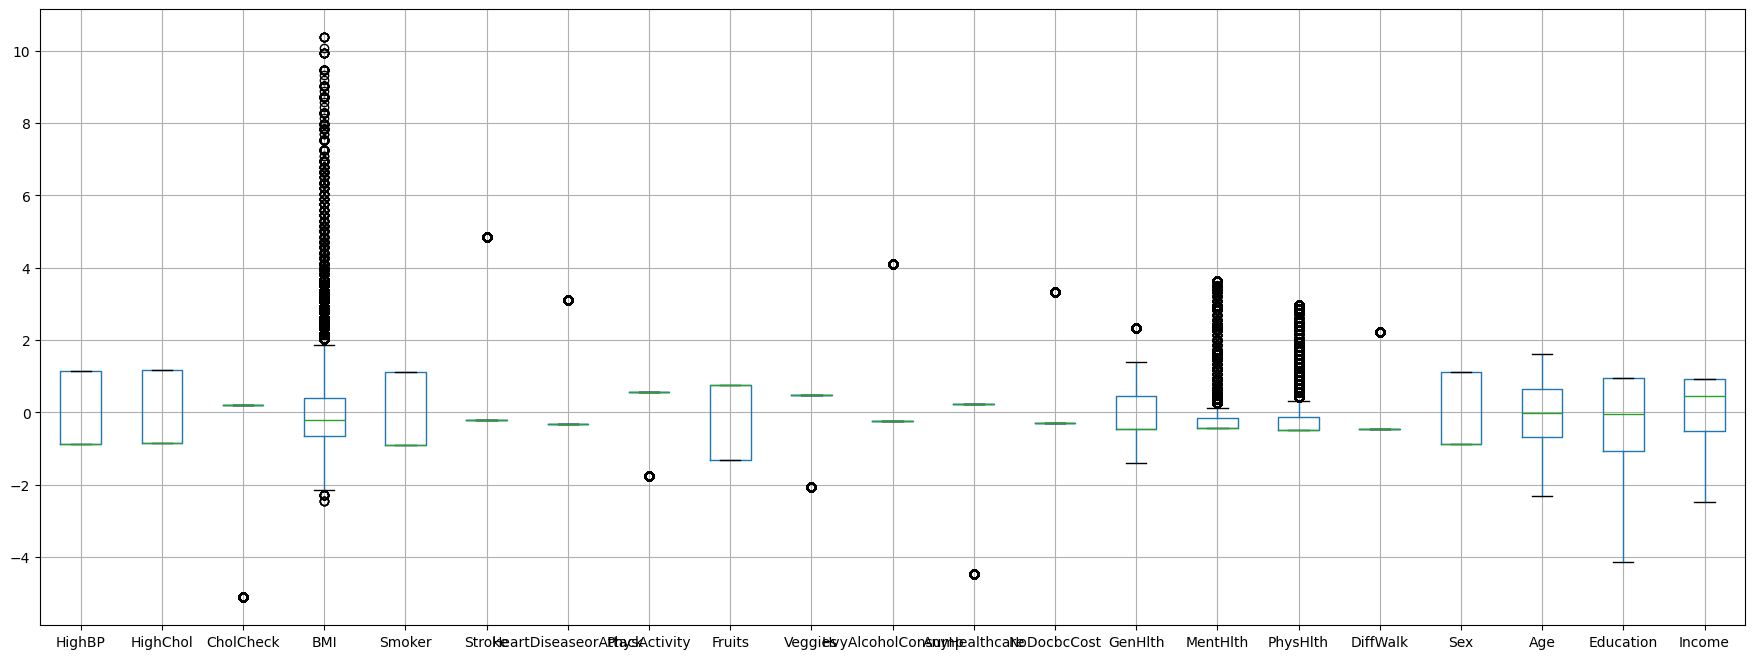

In [141]:
# Visualización gráfica de los datos de entrenamiento normalizados
print('Set de entrenamiento normalizado')
train_scaled.boxplot(figsize=(22, 8))

Set de pruebas normalizado


<Axes: >

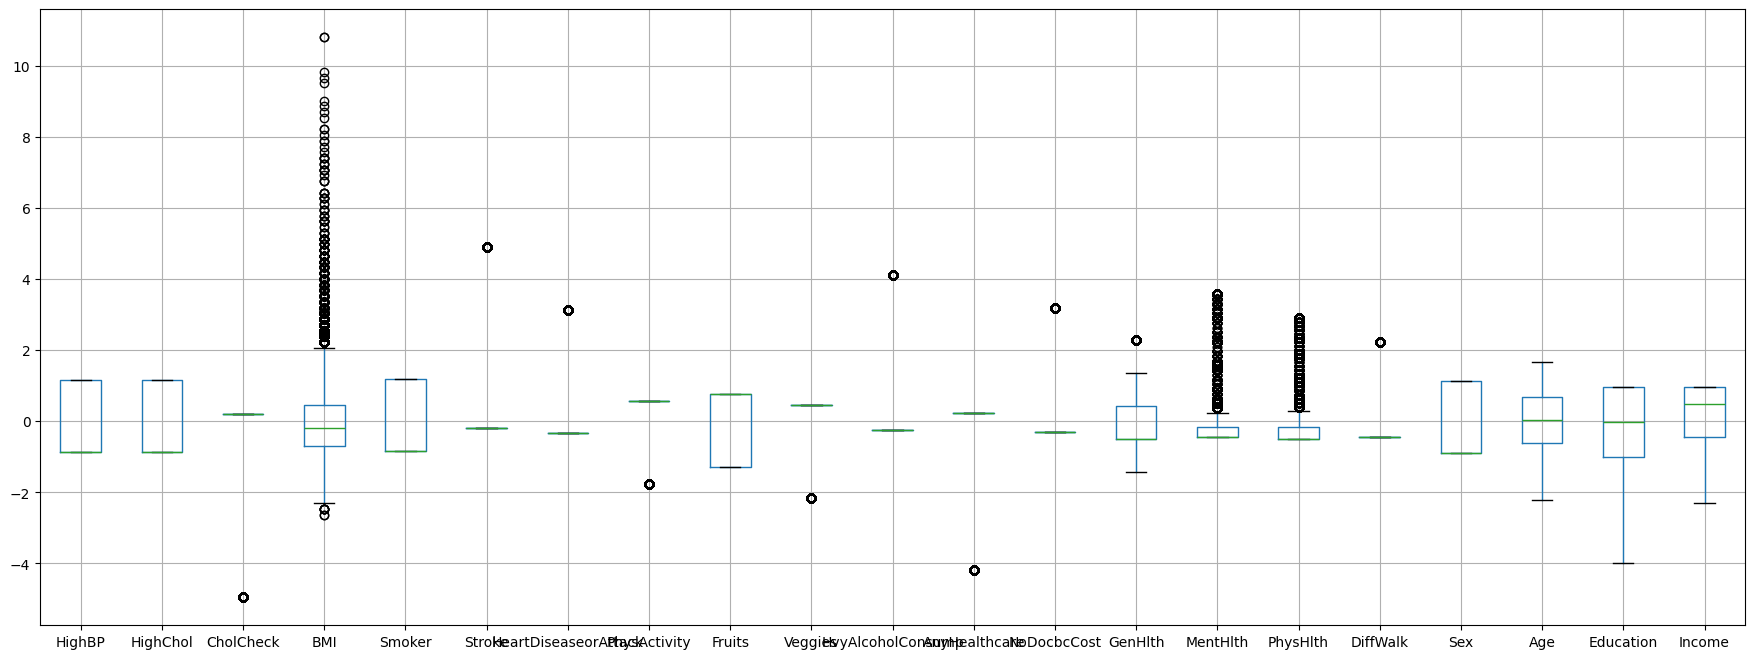

In [142]:
# Visualización gráfica de los datos de pruebas normalizados
print('Set de pruebas normalizado')
test_scaled.boxplot(figsize=(22, 8))

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model  =  Sequential([
                    Dense(128, activation='relu', input_shape=train_scaled.shape[1:]),
                    Dense(128, activation='relu'),
                    Dense(3, activation='softmax')])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,715 (77.01 KB)

 Trainable params: 19,715 (77.01 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
 model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [147]:
history = model.fit(train_scaled, train_labels, epochs = 10)

Epoch 1/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8469 - loss: 0.4071
Epoch 2/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8491 - loss: 0.3971
Epoch 3/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8512 - loss: 0.3936
Epoch 4/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8499 - loss: 0.3933
Epoch 5/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8513 - loss: 0.3903
Epoch 6/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8524 - loss: 0.3890
Epoch 7/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8516 - loss: 0.3911
Epoch 8/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8507 - loss: 0.3927
Epoch 9/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8521 - loss: 0.3892
Epoch 10/10
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8532 - loss: 0.3854


In [148]:
test_loss, test_accuracy = model.evaluate(test_set, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7813 - loss: 0.7339
Test loss: 0.6931215524673462
Test accuracy: 0.7943274974822998


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

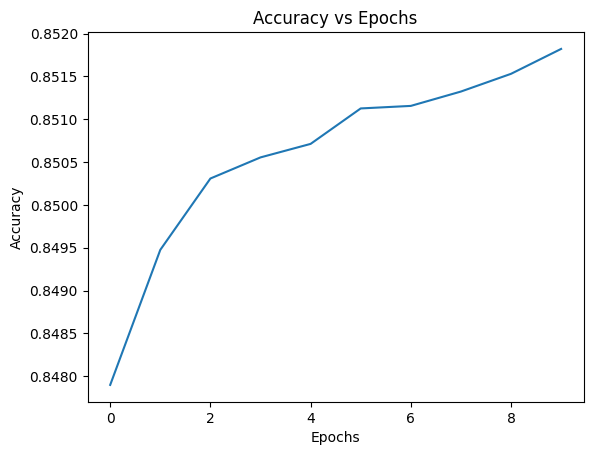

In [149]:
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")